<h2>Metrics part of the model is separated due to ResourceExhautionError<h2/>

In [1]:
import tensorflow as tf
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
import numpy as np

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
model = tf.keras.models.load_model("ImageClassifier_95.h5")

In [5]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [6]:
data_directory = "Dataset/PetImages"
data = tf.keras.utils.image_dataset_from_directory(data_directory, batch_size = 16)
data_iterator = data.as_numpy_iterator()

Found 23481 files belonging to 2 classes.


In [7]:
train_size = int(len(data)*.7)+1 + 47
validation_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1 - 47

print(f"Training size: {train_size}")
print(f"Validation size: {validation_size}")
print(f"Testing size: {test_size}")

print(f"Missed: {len(data) - (train_size + validation_size + test_size)}")

Training size: 1075
Validation size: 293
Testing size: 100
Missed: 0


In [8]:
train = data.take(train_size)
validation = data.skip(train_size).take(validation_size)
test = data.skip(train_size+validation_size).take(test_size)

In [9]:
actual = []
predicted = []

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    proper_yhat = [np.argmax(i) for i in yhat]
    actual.extend(y)
    predicted.extend(proper_yhat)

1/1 [==============================] - 5s 5s/step


In [10]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print(f"Accuracy: {round(accuracy_score(actual, predicted) * 100, 2)}.%")
print(f"Precision: {round(precision_score(actual, predicted) * 100, 2)}%")
print(f"Recall: {round(recall_score(actual, predicted) * 100, 2)}%")
print(f"F1 score: {round(f1_score(actual, predicted) * 100, 2)}%")

Accuracy: 95.98.%
Precision: 96.3%
Recall: 95.82%
F1 score: 96.06%


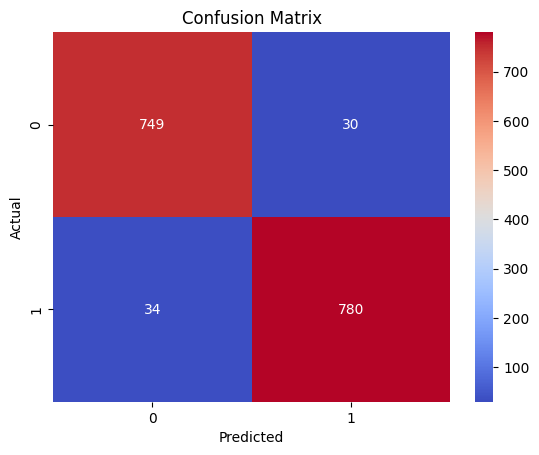

In [11]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(actual, predicted)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='coolwarm')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

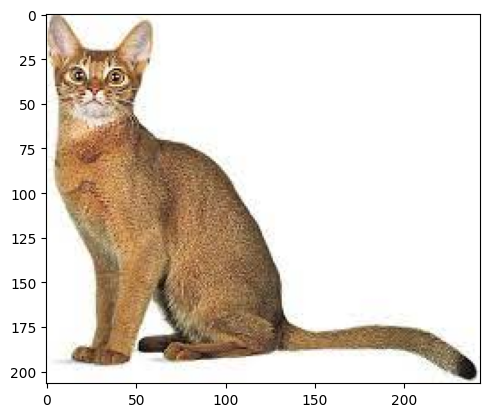

In [26]:
import cv2

img = cv2.imread('cat_test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.show()

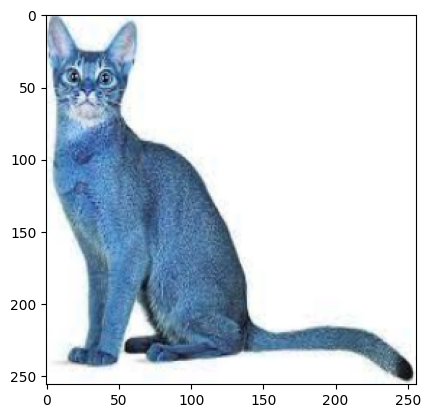

In [27]:
resized = tf.image.resize(img, (256,256))
plt.imshow(resized.numpy().astype(int))
plt.show()

In [14]:
import os

decoder = os.listdir("Dataset/PetImages/")

In [28]:
yhat = model.predict(np.expand_dims(resized, 0))

print(f"This is a {decoder[np.argmax(yhat)]}")

1/1 [==============================] - 0s 52ms/step
This is a Cat


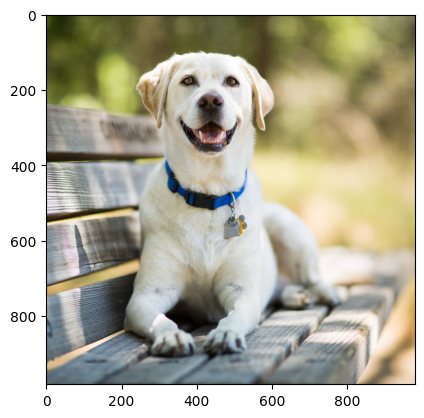

In [19]:
img = cv2.imread('dog_test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.show()

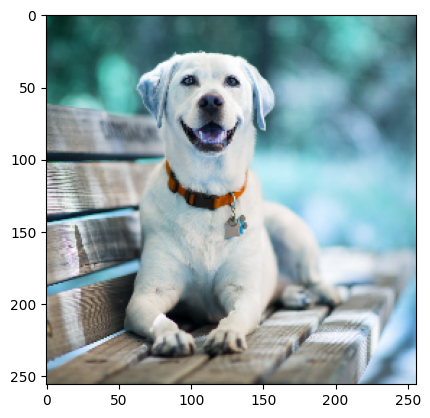

In [20]:
resized = tf.image.resize(img, (256,256))
plt.imshow(resized.numpy().astype(int))
plt.show()

In [25]:
yhat = model.predict(np.expand_dims(resized, 0))
print(yhat)

print(f"This is a {decoder[np.argmax(yhat)]}")

1/1 [==============================] - 0s 50ms/step
[[5.973678e-04 9.959031e-01]]
This is a Dog
